In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


Preprocess the Data
Clustering algorithms perform better when data is scaled and normalized. Here’s how to preprocess the customer_profiles data:

Extract Features for Clustering: Remove non-numerical columns like CustomerID (as they are identifiers).

In [11]:
# Select only numerical columns for clustering
clustering_data = customer_profiles.drop(columns=['CustomerID'])


In [13]:
# Check the types of the columns
print(clustering_data.dtypes)


TotalValue    float64
Quantity        int64
Price         float64
Category       object
dtype: object


In [43]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)


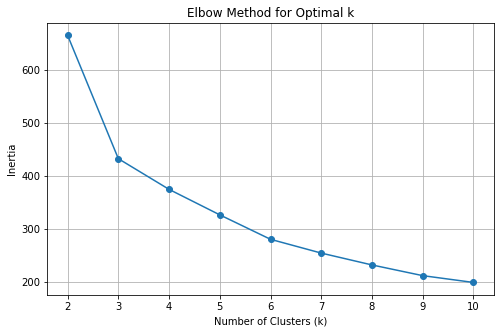

In [37]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(2, 11)  # Test between 2 and 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [44]:
# Fit K-Means with the optimal number of clusters
optimal_k = 3  # Replace with your chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original DataFrame
customer_profiles['Cluster'] = kmeans.labels_


In [39]:
# Calculate DB Index
db_index = davies_bouldin_score(scaled_data, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 0.9875602043075578


In [40]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
customer_profiles['PCA1'] = reduced_data[:, 0]
customer_profiles['PCA2'] = reduced_data[:, 1]


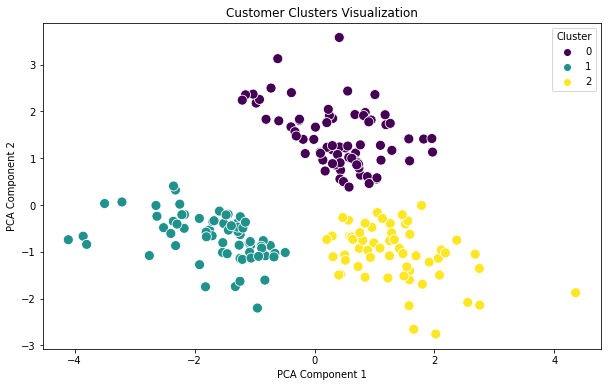

In [41]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster',
    data=customer_profiles, palette='viridis', s=100
)
plt.title('Customer Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [42]:
customer_profiles.to_csv('Customer_Clusters.csv', index=False)
